<a href="https://colab.research.google.com/github/Zakir176/APRS/blob/main/txtToCsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving _chat.txt to _chat (1).txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128139 (\N{KISS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


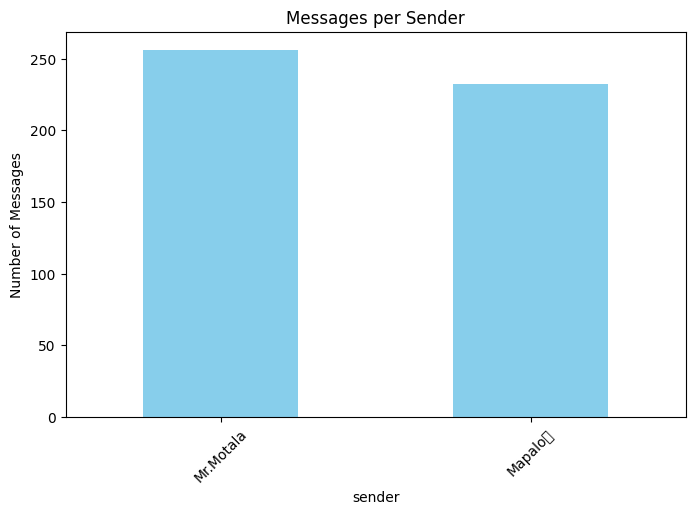

,date,time,sender,message
0,16/06/2025,9:12:54 PM,Mapalo💋,‎Messages and calls are end-to-end encrypted. ...
1,16/06/2025,9:12:54 PM,Mr.Motala,Hey
2,16/06/2025,9:24:33 PM,Mapalo💋,Hey
3,16/06/2025,9:26:41 PM,Mr.Motala,How are you ?
4,16/06/2025,9:27:19 PM,Mr.Motala,This is zakir chibeka gave me your number


In [12]:
# Step 1: Install libraries
!pip install pandas matplotlib regex

# Step 2: Import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt

# Step 3: Upload your WhatsApp chat export (.txt)
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 4: Updated regex pattern for your chat format
pattern = r'^\[(\d{1,2}/\d{1,2}/\d{4}), (\d{1,2}:\d{2}:\d{2} [AP]M)\] ([^:]+): (.+)'

data = []
with open(file_name, 'r', encoding='utf-8') as f:
    for line in f:
        match = re.match(pattern, line)
        if match:
            date, time, sender, message = match.groups()
            data.append([date, time, sender, message])

df = pd.DataFrame(data, columns=['date', 'time', 'sender', 'message'])

# Step 5: Save parsed data to CSV
csv_file = "whatsapp_chats_parsed.csv"
df.to_csv(csv_file, index=False, encoding='utf-8')
files.download(csv_file)

# Step 6: Show message count chart per sender
msg_counts = df['sender'].value_counts()

plt.figure(figsize=(8,5))
msg_counts.plot(kind='bar', color='skyblue')
plt.title("Messages per Sender")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.show()

df.head()


this is the loading script for the exported text file from whatsapp
the .txt flie will be made into a csv file

In [13]:
from google.colab import files
import pandas as pd
import io
import time

def safe_upload():
    try:
        return files.upload()
    except KeyboardInterrupt:
        print("\nUpload cancelled. Retrying...")
        time.sleep(2)
        return safe_upload()

# Step 1: Upload with error handling
print("Please select your WhatsApp chat CSV file:")
uploaded = safe_upload()

# Check if upload succeeded
if not uploaded:
    raise ValueError("No file uploaded. Please try again.")

# Step 2: Process the file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# (Keep your existing tone/urgency labeling code here)
# ...

print("Labeling completed!")

Please select your WhatsApp chat CSV file:


Saving whatsapp_chats_parsed.csv to whatsapp_chats_parsed (1).csv
Labeling completed!


this part works on cconverting the csv file into an advanced one classifying whether it into two things tone and urgency of reply


In [14]:
from google.colab import files
import pandas as pd
import io
import time

# --- File Upload with Progress Check ---
print("Processing your WhatsApp chat file...")
try:
    # Read the uploaded file
    df = pd.read_csv(io.BytesIO(uploaded['whatsapp_chats_parsed.csv']))
    print("✅ File loaded successfully! ({} rows)".format(len(df)))

    # --- Enhanced Labeling System ---
    tone_keywords = {
        'casual': ['lol', 'haha', '😊', 'hey', 'okay', '👍', 'thanks', 'thx'],
        'formal': ['dear', 'regards', 'sincerely', 'please', 'appreciate', 'kindly'],
        'apologetic': ['sorry', 'apologies', 'my bad', 'oops', 'regret']
    }

    urgency_keywords = {
        'high': ['urgent', 'asap', 'now!', 'emergency', 'important', 'quick'],
        'medium': ['when you can', 'soon', 'later', 'at your convenience'],
        'low': ['no rush', 'whenever', 'anytime', 'no hurry']
    }

    def label_tone(text):
        text = str(text).lower()
        for tone, keywords in tone_keywords.items():
            if any(keyword in text for keyword in keywords):
                return tone
        return 'neutral'

    def label_urgency(text):
        text = str(text).lower()
        for urgency, keywords in urgency_keywords.items():
            if any(keyword in text for keyword in keywords):
                return urgency
        return 'medium'  # Default

    # --- Apply Labeling ---
    print("🔍 Analyzing message tones...")
    df['tone'] = df['message'].apply(label_tone)

    print("⏱️ Categorizing urgency levels...")
    df['urgency'] = df['message'].apply(label_urgency)

    # --- Save Results ---
    output_filename = 'whatsapp_chats_labeled.csv'
    df.to_csv(output_filename, index=False)
    print(f"📁 Saved labeled data to {output_filename}")

    # --- Download ---
    files.download(output_filename)
    print("🎉 All done! File downloaded to your computer.")

except Exception as e:
    print(f"❌ Error: {str(e)}")
    print("Please check:")
    print("1. File is proper CSV format")
    print("2. Contains 'message' column")
    print("3. No special characters breaking parsing")

Processing your WhatsApp chat file...
❌ Error: 'whatsapp_chats_parsed.csv'
Please check:
1. File is proper CSV format
2. Contains 'message' column
3. No special characters breaking parsing
